In [3]:
import matplotlib.pyplot as plt
import pandas as pd

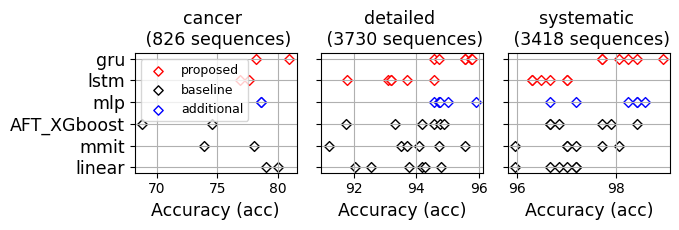

In [25]:
def plot_multiple_datasets(datasets):
    # Determine number of datasets for subplot layout
    num_datasets = len(datasets)
    
    # Create a figure with subplots in one row
    fig, axes = plt.subplots(1, num_datasets, figsize=(2.3 * num_datasets, 2.4), sharey=True)  # Share y-axis

    # If there is only one dataset, axes will not be an array, so make sure it's iterable
    if num_datasets == 1:
        axes = [axes]

    # Loop through each dataset and subplot
    dataset_size = [826, 3730, 3418]
    ignore_number = [0, 0, 0]
    for i, dataset in enumerate(datasets):
        # Load dataset
        acc_df = pd.read_csv(f"acc_rate_csvs_systematic_detailed_cancer/{dataset}.csv")
        acc_df = acc_df[acc_df['method'] != 'constant']

        # Sort by accuracy and drop the first 5 smallest values
        acc_df = acc_df.sort_values(by='acc').iloc[ignore_number[i]:]

        # Define a fixed order for the methods
        fixed_method_order = ['linear', 'mmit', 'AFT_XGboost', 'mlp', 'lstm', 'gru']

        # Create a subplot for each dataset
        ax = axes[i]

        # Add labels for the first plot
        ax.set_xlabel('Accuracy (acc)', fontsize = 12.5)
        ax.set_title(f'{dataset} \n ({dataset_size[i]} sequences)', fontsize=12.5)  # Adjust fontsize as needed

        # Plot accuracy per fold
        for method in fixed_method_order:
            if method in acc_df['method'].unique():
                method_data = acc_df[acc_df['method'] == method]
                
                # Set color to red if method contains 'gru' or 'lstm', otherwise black
                color = 'red' if "gru" in method or "lstm" in method or "rnn" in method else 'blue' if "mlp" in method else 'black'
                
                # Scatter plot (all methods treated the same)
                ax.scatter(method_data['acc'], [method]*len(method_data), s=25, marker='D', color='white', edgecolor=color, linewidth=1)

        # Show y-axis ticks and labels only for the left-most subplot
        ax.set_yticks(fixed_method_order)  # Set y-ticks to fixed method order
        ax.tick_params(axis='y', labelsize=12.5)
        ax.grid(True)

        # Create legend for the first subplot
        if i == 0:
            ax.scatter([], [], edgecolor='red', color='white', marker='D', s=10, label='proposed')  # Red diamond for proposed
            ax.scatter([], [], edgecolor='black', color='white', marker='D', s=10, label='baseline')  # Black diamond for previous work
            ax.scatter([], [], edgecolor='blue', color='white', marker='D', s=10, label='additional')  # Blue diamond for additional
            ax.legend(loc='upper left', fontsize=9, markerscale=1.5)  # Add legend with font size and markerscale

    # Adjust layout to ensure everything fits in one row
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.savefig('pdfs/acc_cancer.pdf')

datasets = ['cancer', 'detailed', 'systematic']
plot_multiple_datasets(datasets)